# Write a Python program that gathers, summarizes and plots weather data.
1. Go to the WorldWeather API site (https://www.worldweatheronline.com/weather-api/) and get a free 30-day trial. Remember your API key.
2. Get one month of historical temperature data for 20 distinct locations.
3. Create a summary table that summarizes them in, mean and max temperature values during that month for each location.
4. Plot the mean temperature for each location, compare the temperature data and share your insights.

NOTE: Please start this assignment early. You are limited to 500 API calls per day.

# Request Data

In [48]:
import requests
import json
import pandas as pd

NEWS_API_KEY = '5f4f35bf5b3643a3a6904602233110'
NEWS_API_URL = 'https://api.worldweatheronline.com/premium/v1/past-weather.ashx'

In [44]:
# subtract the month: September
for day in range(1, 31):  # Assuming you want data for the entire month
    date = f'2023-09-{day:02}'
    #print(date)

In [27]:
# first select 10 Cities
locations = ['London', 'Paris', 'New York', 'Tokyo', 'Seoul', 'Beijing', 'Los Angeles', 'Moscow', 'Chicago', 'Bangkok'] 

all_data = {}  # Dictionary to store all retrieved data

# Loop through each location
for location in locations:
    data_for_location = {}  # Dictionary to store data for each location
    for day in range(1, 31):  # Assuming you want data for the entire month
        date = f'2023-09-{day:02}'  # Format the date (year-month-day)

        params = {
                    'q': location,
                    'date': date,
                    'format': 'json',
                    'tp': '24',
                    'Key': NEWS_API_KEY
                }

        response = requests.get(NEWS_API_URL, params=params)

        if response.status_code == 200:
            try:
                data = response.json()
                data_for_location[date] = data  # Store the retrieved data for the date
            except ValueError as e:
                print(f"JSON decoding failed for {location} on {date}:", e)
        else:
            print(f"Request failed for {location} on {date} with status code:", response.status_code)

    all_data[location] = data_for_location  # Store data for the location in the main dictionary

In [31]:
# Select another 10 cities
locations1 = ['Miami', 'Toronto', 'Dallas', 'Italy', 'Singapore', 'Atlanta', 'Shanghai', 'Taiwan', 'Osaka', 'Mexico City'] 

all_data1 = {}  # Dictionary to store all retrieved data

# Loop through each location
for location in locations1:
    data_for_location1 = {}  # Dictionary to store data for each location
    for day in range(1, 31):  # Assuming you want data for the entire month
        date = f'2023-09-{day:02}'  # Format the date (year-month-day)

        params = {
                    'q': location,
                    'date': date,
                    'format': 'json',
                    'tp': '24',
                    'Key': NEWS_API_KEY
                }

        response = requests.get(NEWS_API_URL, params=params)

        if response.status_code == 200:
            try:
                data = response.json()
                data_for_location1[date] = data  # Store the retrieved data for the date
            except ValueError as e:
                print(f"JSON decoding failed for {location} on {date}:", e)
        else:
            print(f"Request failed for {location} on {date} with status code:", response.status_code)

    all_data1[location] = data_for_location1  # Store data for the location in the main dictionary

In [39]:
# combine two json dictionaries together
data = {**all_data, **all_data1}

# Write the combined data to a new JSON file
with open('combined_weather_data.json', 'w') as file:
    json.dump(data, file, indent=4)

print("Combined data saved to 'combined_weather_data.json'")

Combined data saved to 'combined_weather_data.json'


In [45]:
# 20 cities
data.keys()

dict_keys(['London', 'Paris', 'New York', 'Tokyo', 'Seoul', 'Beijing', 'Los Angeles', 'Moscow', 'Chicago', 'Bangkok', 'Miami', 'Toronto', 'Dallas', 'Italy', 'Singapore', 'Atlanta', 'Shanghai', 'Taiwan', 'Osaka', 'Mexico City'])

In [47]:
# 30 days
len(data['London']) 

30

In [66]:
# record on specific day
data['London']['2023-09-01']['data']['weather'][0]

{'date': '2023-09-01',
 'astronomy': [{'sunrise': '06:12 AM',
   'sunset': '07:48 PM',
   'moonrise': '08:37 PM',
   'moonset': '07:47 AM',
   'moon_phase': 'Waxing Gibbous',
   'moon_illumination': '85'}],
 'maxtempC': '23',
 'maxtempF': '73',
 'mintempC': '14',
 'mintempF': '57',
 'avgtempC': '18',
 'avgtempF': '65',
 'totalSnow_cm': '0.0',
 'sunHour': '7.9',
 'uvIndex': '4',
 'hourly': [{'time': '24',
   'tempC': '23',
   'tempF': '73',
   'windspeedMiles': '3',
   'windspeedKmph': '5',
   'winddirDegree': '210',
   'winddir16Point': 'SSW',
   'weatherCode': '122',
   'weatherIconUrl': [{'value': 'https://cdn.worldweatheronline.com/images/wsymbols01_png_64/wsymbol_0004_black_low_cloud.png'}],
   'weatherDesc': [{'value': 'Overcast'}],
   'precipMM': '0.0',
   'precipInches': '0.0',
   'humidity': '71',
   'visibility': '9',
   'visibilityMiles': '5',
   'pressure': '1011',
   'pressureInches': '30',
   'cloudcover': '63',
   'HeatIndexC': '19',
   'HeatIndexF': '66',
   'DewPointC':

# Summary Table

In [98]:
lis = ['date','maxtempC','mintempC','avgtempC']
City = ['London', 'Paris', 'New York', 'Tokyo', 'Seoul', 'Beijing', 'Los Angeles', 'Moscow', 'Chicago', 'Bangkok', 'Miami', 'Toronto', 'Dallas', 'Italy', 'Singapore', 'Atlanta', 'Shanghai', 'Taiwan', 'Osaka', 'Mexico City'] 

In [97]:
data_list = []

# Loop through each day in September 2023
for day in range(1, 31):
    date_key = f'2023-09-{day:02}'
    
    # Initialize dictionaries to store temperature details for each day
    min_temps = {}
    max_temps = {}
    avg_temps = {}

    # Loop through each city
    for city in City:
        if date_key in data[city]:
            weather_info = data[city][date_key]['data']['weather'][0]
            date = weather_info['date']
            min_temp = weather_info['mintempC']
            max_temp = weather_info['maxtempC']
            avg_temp = weather_info['avgtempC']

            # Append temperature details for each city and day to the data list
            data_list.append({'Date': date, 'City': city, 'MinTemp': min_temp, 'MaxTemp': max_temp, 'AvgTemp': avg_temp})

df = pd.DataFrame(data_list)
print(df)

           Date         City MinTemp MaxTemp AvgTemp
0    2023-09-01       London      14      23      18
1    2023-09-01        Paris      16      24      20
2    2023-09-01     New York      16      27      21
3    2023-09-01        Tokyo      27      32      29
4    2023-09-01        Seoul      19      29      24
..          ...          ...     ...     ...     ...
595  2023-09-30      Atlanta      20      32      26
596  2023-09-30     Shanghai      23      27      24
597  2023-09-30       Taiwan      29      34      31
598  2023-09-30        Osaka      21      28      25
599  2023-09-30  Mexico City      13      24      18

[600 rows x 5 columns]


# Plot
Plot the mean temperature for each location, compare the temperature data and share your insights.

In [99]:
import matplotlib.pyplot as plt

In [110]:
# Calculate the mean temperature for each location
df['AvgTemp'] = df['AvgTemp'].astype(float)
mean = df.groupby('City')['AvgTemp'].mean().reset_index()
mean

,City,AvgTemp
0,Atlanta,24.400000
1,Bangkok,28.366667
2,Beijing,22.266667
3,Chicago,20.633333
4,Dallas,30.433333
5,Italy,23.400000
6,London,19.166667
7,Los Angeles,21.900000
8,Mexico City,17.700000
9,Miami,28.866667


In [112]:
mean = mean.sort_values(by='AvgTemp', ascending=False)

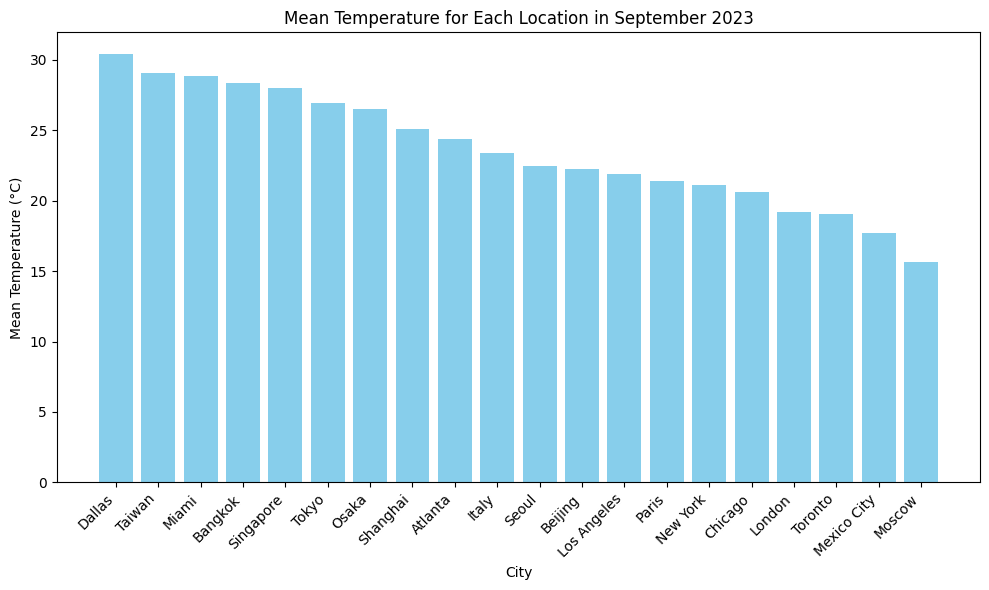

In [114]:
plt.figure(figsize=(10, 6))
plt.bar(mean['City'], mean['AvgTemp'], color='skyblue')
plt.xlabel('City')
plt.ylabel('Mean Temperature (°C)')
plt.title('Mean Temperature for Each Location in September 2023')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Display the plot
plt.tight_layout()
plt.show()

We create a bar plot showing the mean temperature (in °C) for each location in descending order. The x-axis represents the cities, and the y-axis represents the mean temperature.

In [120]:
max(mean['AvgTemp'])-min(mean['AvgTemp'])

14.766666666666667

We see that on average for each month, Dallas has the highest mean temperatures and Moscow has the lowest mean temperatures in September 2023. Also, the greatest difference between these two cities is approximately 15 degrees on average. 